# 1 - Import Libraries

In [146]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA

# 2 - Data Loading

In [147]:
df = pd.read_csv('telco_data_clean.csv', index_col=False)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Expense,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium Expense,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium Expense,4
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1


# 3 - Feature Selection

In [148]:
dfnew = df.loc[(df['churn']=='Yes')]
dfnew.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,High Expense,1
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,High Expense,3
13,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,High Expense,5


In [149]:
dfnew.shape

(1869, 22)

In [150]:
dfnew.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'monthly_charges_cat', 'tenure_year'],
      dtype='object')

In [151]:
for x in df.columns:
    contingency_table4 = pd.crosstab(df[x],df['churn'])
    print(f'column {x} {stats.chi2_contingency(contingency_table4).pvalue}')

column gender 0.4904884707065509
column senior_citizen 2.4792557203954705e-36
column partner 3.97379757451591e-36
column dependents 2.0196592017051303e-42
column tenure 3.471813048469505e-176
column phone_service 0.34992398942431924
column multiple_lines 0.0035679273999811405
column internet_service 5.831198962237274e-159
column online_security 1.4006867477839222e-184
column online_backup 7.776099238804965e-131
column device_protection 1.9593887862403176e-121
column tech_support 7.407807748843711e-180
column streaming_tv 1.324641113169159e-81
column streaming_movies 5.353560421401324e-82
column contract 7.326182186265472e-257
column paperless_billing 8.236203353962564e-58
column payment_method 1.4263098511063342e-139
column monthly_charges 2.9951566174415275e-18
column total_charges 0.5858750101997261
column churn 0.0
column monthly_charges_cat 7.984983286537826e-73
column tenure_year 2.358395063933462e-188


In [152]:
columns = ['senior_citizen','partner','dependents', 'internet_service', 'tenure',
        'online_security','online_backup','device_protection','tech_support',
        'streaming_tv', 'streaming_movies', 'contract',
        'paperless_billing', 'payment_method', 'monthly_charges', 'churn']
dfnew = dfnew.drop(columns=[col for col in dfnew if col not in columns])
dfnew.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'churn'],
      dtype='object')

In [153]:
new_num = ['tenure', 'monthly_charges']
new_cat = ['senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
       'contract', 'paperless_billing', 'payment_method', 'churn']

# 4 - Feature Scaling

In [154]:
for x in new_num:
    print(x, 'skewness is', dfnew[x].skew())

tenure skewness is 1.1492802882380029
monthly_charges skewness is -0.7293738092658485


In [155]:
scaler = StandardScaler()
dfnew_scaled = scaler.fit_transform(dfnew[new_num])

# 5 - Merge Data

In [156]:
dfnew_final = np.concatenate([dfnew_scaled, dfnew[new_cat]], axis=1)
dfnew_final = pd.DataFrame(dfnew_final, columns=['tenure', 'monthly_charges'] + new_cat)
dfnew_final = dfnew_final.infer_objects()
dfnew_final

,tenure,monthly_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
0,-0.818356,-0.835028,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
1,-0.818356,-0.151720,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
2,-0.511072,1.022272,No,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
3,0.513209,1.231117,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
4,1.588704,1.186509,No,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,-0.306216,-0.593741,No,No,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,Yes
1865,-0.459858,-1.226359,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes
1866,-0.869570,0.053070,Yes,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
1867,2.510556,1.156095,No,No,No,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),Yes


# 6 - Model Definition

In [157]:
index_cat_columns = [dfnew_final.columns.get_loc(col) for col in new_cat]

print('Categorical columns        : ', new_cat)
print('Categorical columns index  : ', index_cat_columns)

Categorical columns        :  ['senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']
Categorical columns index  :  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Cluster creation :  2
Cluster creation :  3
Cluster creation :  4
Cluster creation :  5
Cluster creation :  6


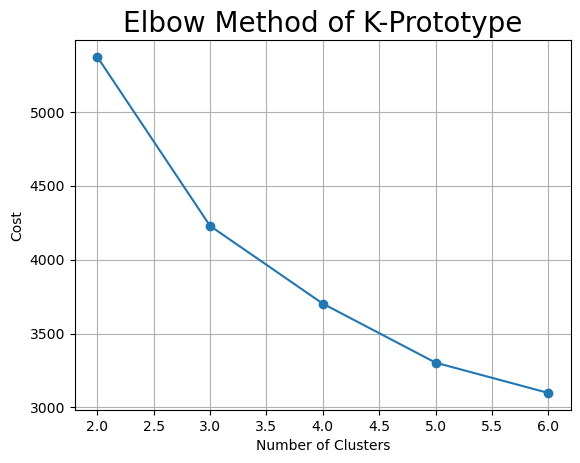

In [158]:
max_clusters = 6
cost = []
for k in range(2, max_clusters+1):
  kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_jobs=-1)
  kproto.fit_predict(dfnew_final, categorical=index_cat_columns)
  cost.append(kproto.cost_)
  print('Cluster creation : ', k)

plt.plot(range(2, max_clusters+1), cost, marker ="o")
plt.grid()
plt.title('Elbow Method of K-Prototype', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

# 7 - Model Training

In [159]:
kp = KPrototypes(n_clusters=3, random_state=42)
pred = kp.fit_predict(dfnew_final, categorical=index_cat_columns)
pred

array([1, 2, 2, ..., 2, 0, 2], dtype=uint16)

In [160]:
dfnew['cluster'] = pred
dfnew

,senior_citizen,partner,dependents,tenure,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn,cluster
2,No,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1
4,No,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,2
5,No,No,No,8,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes,2
8,No,Yes,No,28,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes,0
13,No,No,No,49,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,No,No,No,12,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,Yes,1
7015,No,No,No,9,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,Yes,1
7021,Yes,No,No,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,Yes,2
7023,No,No,No,67,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,Yes,0


# 8 - Model Analysis

<Axes: >

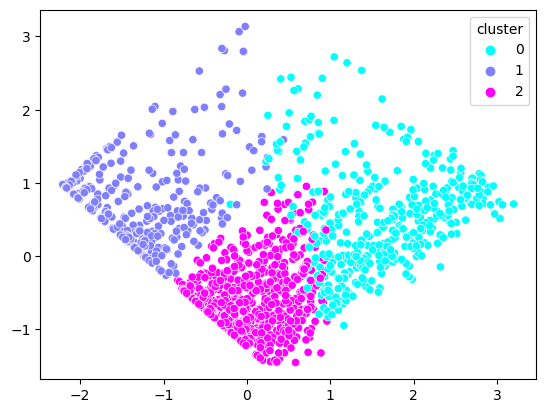

In [161]:
pca_2d = PCA(n_components=2)
pca_2d.fit(dfnew_scaled)

dfnew_scaled_pca_2d = pca_2d.fit_transform(dfnew_scaled)

sns.scatterplot(x=dfnew_scaled_pca_2d[:,0], y=dfnew_scaled_pca_2d[:,1], hue=dfnew['cluster'], palette='cool')

## 8.1 - 1st Cluster

In [162]:
dfnew[dfnew['cluster']==0].describe()

,tenure,monthly_charges,cluster
count,446.000000,446.000000,446.0
mean,46.964126,94.004596,0.0
std,13.997225,15.253933,0.0
min,19.000000,39.300000,0.0
25%,36.000000,86.000000,0.0
50%,47.000000,99.050000,0.0
75%,58.000000,104.500000,0.0
max,72.000000,118.350000,0.0


In [163]:
for x in new_cat:
    print(dfnew[dfnew['cluster']==0][x].value_counts())

No     294
Yes    152
Name: senior_citizen, dtype: int64
Yes    281
No     165
Name: partner, dtype: int64
No     339
Yes    107
Name: dependents, dtype: int64
Fiber optic    386
DSL             60
Name: internet_service, dtype: int64
No     319
Yes    127
Name: online_security, dtype: int64
Yes    255
No     191
Name: online_backup, dtype: int64
Yes    269
No     177
Name: device_protection, dtype: int64
No     306
Yes    140
Name: tech_support, dtype: int64
Yes    352
No      94
Name: streaming_tv, dtype: int64
Yes    354
No      92
Name: streaming_movies, dtype: int64
Month-to-month    279
One year          125
Two year           42
Name: contract, dtype: int64
Yes    362
No      84
Name: paperless_billing, dtype: int64
Electronic check             239
Bank transfer (automatic)     95
Credit card (automatic)       91
Mailed check                  21
Name: payment_method, dtype: int64
Yes    446
Name: churn, dtype: int64


## 8.2 - 2nd Cluster

In [164]:
dfnew[dfnew['cluster']==1].describe()

,tenure,monthly_charges,cluster
count,477.000000,477.000000,477.0
mean,8.203354,38.840042,1.0
std,11.315498,13.626142,0.0
min,1.000000,18.850000,1.0
25%,1.000000,24.750000,1.0
50%,3.000000,44.150000,1.0
75%,11.000000,50.150000,1.0
max,61.000000,63.600000,1.0


In [166]:
for x in new_cat:
    print(dfnew[dfnew['cluster']==1][x].value_counts())

No     411
Yes     66
Name: senior_citizen, dtype: int64
No     359
Yes    118
Name: partner, dtype: int64
No     383
Yes     94
Name: dependents, dtype: int64
DSL    364
No     113
Name: internet_service, dtype: int64
No                     297
No internet service    113
Yes                     67
Name: online_security, dtype: int64
No                     295
No internet service    113
Yes                     69
Name: online_backup, dtype: int64
No                     297
No internet service    113
Yes                     67
Name: device_protection, dtype: int64
No                     299
No internet service    113
Yes                     65
Name: tech_support, dtype: int64
No                     303
No internet service    113
Yes                     61
Name: streaming_tv, dtype: int64
No                     297
No internet service    113
Yes                     67
Name: streaming_movies, dtype: int64
Month-to-month    448
One year           23
Two year            6
Name: contract, dt

## 8.3 - 3rd Cluster

In [165]:
dfnew[dfnew['cluster']==2].describe()

,tenure,monthly_charges,cluster
count,946.000000,946.000000,946.0
mean,9.243129,83.169239,2.0
std,8.726538,10.145146,0.0
min,1.000000,64.400000,2.0
25%,2.000000,74.750000,2.0
50%,7.000000,81.075000,2.0
75%,14.000000,90.550000,2.0
max,43.000000,112.950000,2.0


In [167]:
for x in new_cat:
    print(dfnew[dfnew['cluster']==2][x].value_counts())

No     688
Yes    258
Name: senior_citizen, dtype: int64
No     676
Yes    270
Name: partner, dtype: int64
No     821
Yes    125
Name: dependents, dtype: int64
Fiber optic    911
DSL             35
Name: internet_service, dtype: int64
No     845
Yes    101
Name: online_security, dtype: int64
No     747
Yes    199
Name: online_backup, dtype: int64
No     737
Yes    209
Name: device_protection, dtype: int64
No     841
Yes    105
Name: tech_support, dtype: int64
No     545
Yes    401
Name: streaming_tv, dtype: int64
No     549
Yes    397
Name: streaming_movies, dtype: int64
Month-to-month    928
One year           18
Name: contract, dtype: int64
Yes    769
No     177
Name: paperless_billing, dtype: int64
Electronic check             642
Bank transfer (automatic)    113
Mailed check                 105
Credit card (automatic)       86
Name: payment_method, dtype: int64
Yes    946
Name: churn, dtype: int64
